In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import mean_squared_error as MSE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('data_cleaned.csv')

In [4]:
df = df.drop(df.columns[0], axis =1)

In [5]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code
0,2310000170,750000.0,3,2.0,1590,7754,1.0,440,0,1990,47.357065,-122.04067,98038,471.698113,7,4
1,2095600170,580000.0,3,3.0,2020,4482,1.0,600,120,1992,47.399470,-122.20413,98031,287.128713,7,3
2,8682282030,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,47.708760,-122.02073,98053,740.740741,9,3
3,5727500011,785000.0,3,2.0,1350,7354,1.0,460,120,1985,47.751020,-122.33447,98133,581.481481,7,5
4,1421059003,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,47.310595,-122.12938,98092,323.076923,10,3


In [6]:
df['sqft_living'].describe()

count    2618.000000
mean     1945.639037
std       633.012981
min       770.000000
25%      1492.500000
50%      1840.000000
75%      2260.000000
max      5490.000000
Name: sqft_living, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2618 non-null   int64  
 1   price           2618 non-null   float64
 2   bedrooms        2618 non-null   int64  
 3   bathrooms       2618 non-null   float64
 4   sqft_living     2618 non-null   int64  
 5   sqft_lot        2618 non-null   int64  
 6   floors          2618 non-null   float64
 7   sqft_garage     2618 non-null   int64  
 8   sqft_patio      2618 non-null   int64  
 9   yr_built        2618 non-null   int64  
 10  lat             2618 non-null   float64
 11  long            2618 non-null   float64
 12  postal_code     2618 non-null   int64  
 13  price_sqft      2618 non-null   float64
 14  grade_code      2618 non-null   int64  
 15  condition_code  2618 non-null   int64  
dtypes: float64(6), int64(10)
memory usage: 327.4 KB


In [8]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code
0,2310000170,750000.0,3,2.0,1590,7754,1.0,440,0,1990,47.357065,-122.04067,98038,471.698113,7,4
1,2095600170,580000.0,3,3.0,2020,4482,1.0,600,120,1992,47.399470,-122.20413,98031,287.128713,7,3
2,8682282030,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,47.708760,-122.02073,98053,740.740741,9,3
3,5727500011,785000.0,3,2.0,1350,7354,1.0,460,120,1985,47.751020,-122.33447,98133,581.481481,7,5
4,1421059003,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,47.310595,-122.12938,98092,323.076923,10,3


In [9]:
numbers_df = df.drop(['postal_code', 'lat', 'long'], axis=1)

In [10]:
scaled_df = StandardScaler().fit(numbers_df)
new_df = pd.DataFrame(scaled_df.transform(numbers_df), columns= numbers_df.columns)
new_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,price_sqft,grade_code,condition_code
0,-0.789481,-0.270591,-0.422916,-0.679218,-0.561927,-0.286390,0.0,-0.182910,-1.011665,0.226147,0.127758,-0.764958,0.679186
1,-0.862936,-0.709148,-0.422916,1.088368,0.117494,-0.349550,0.0,0.613444,-0.517229,0.426063,-0.971479,-0.764958,-0.820063
2,1.393696,2.954094,-0.422916,1.088368,1.191927,-0.287548,0.0,0.265039,1.625329,1.825479,1.730091,1.957896,-0.820063
3,0.381372,-0.180300,-0.422916,-0.679218,-0.941138,-0.294111,0.0,-0.083365,-0.517229,-0.273644,0.781593,-0.764958,2.178435
4,-1.094037,2.128574,-0.422916,0.204575,5.142047,3.541122,0.0,3.002504,1.748939,1.925437,-0.757383,3.319323,-0.820063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,-0.271668,-0.915528,-0.422916,0.204575,-0.530326,-0.296119,0.0,0.065951,0.100817,-0.973352,-0.831936,-0.764958,-0.820063
2614,-0.977537,-0.760743,-0.422916,-0.679218,-0.735732,-0.266778,0.0,0.314811,-0.270011,-0.273644,-0.428025,-0.764958,0.679186
2615,-0.755872,0.402723,-0.422916,-0.679218,-0.767333,-0.223829,0.0,-0.083365,-0.270011,-0.673477,1.442580,0.596469,-0.820063
2616,-0.710853,0.064776,0.864520,0.204575,0.496705,-0.326791,0.0,-0.083365,-0.063995,1.225729,-0.362500,0.596469,-0.820063


In [11]:
new_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,price_sqft,grade_code,condition_code
id,1.000000,0.001849,-0.085426,-0.058254,-0.064287,-0.188410,NaN,-0.033111,-0.063771,0.043437,0.055729,0.006750,-0.012768
price,0.001849,1.000000,0.163144,0.336551,0.533372,0.173581,NaN,0.191680,0.269960,0.089904,0.681613,0.560863,0.035037
bedrooms,-0.085426,0.163144,1.000000,0.549820,0.497702,0.017981,NaN,0.070644,0.103804,-0.103391,-0.225889,0.118357,0.092598
bathrooms,-0.058254,0.336551,0.549820,1.000000,0.633446,0.055614,NaN,0.199298,0.222674,0.037961,-0.150264,0.327461,0.055406
sqft_living,-0.064287,0.533372,0.497702,0.633446,1.000000,0.241080,NaN,0.277111,0.394535,0.065084,-0.198811,0.614683,0.009331
sqft_lot,-0.188410,0.173581,0.017981,0.055614,0.241080,1.000000,NaN,0.066841,0.173007,0.079547,0.007895,0.173648,-0.016297
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_garage,-0.033111,0.191680,0.070644,0.199298,0.277111,0.066841,NaN,1.000000,0.137558,0.029674,-0.026007,0.339029,-0.034241
sqft_patio,-0.063771,0.269960,0.103804,0.222674,0.394535,0.173007,NaN,0.137558,1.000000,-0.041705,-0.009296,0.291528,0.090253
yr_built,0.043437,0.089904,-0.103391,0.037961,0.065084,0.079547,NaN,0.029674,-0.041705,1.000000,0.043261,0.158334,-0.317826


In [12]:
new_df.corr()['price'].map(abs).sort_values(ascending=False)

price             1.000000
price_sqft        0.681613
grade_code        0.560863
sqft_living       0.533372
bathrooms         0.336551
sqft_patio        0.269960
sqft_garage       0.191680
sqft_lot          0.173581
bedrooms          0.163144
yr_built          0.089904
condition_code    0.035037
id                0.001849
floors                 NaN
Name: price, dtype: float64

In [13]:
numbers_df['price'].describe()

count    2.618000e+03
mean     8.548906e+05
std      3.877088e+05
min      4.118100e+04
25%      5.800000e+05
50%      7.500000e+05
75%      1.025000e+06
max      2.301000e+06
Name: price, dtype: float64

In [14]:
X = new_df.drop(columns = ['price', 'floors', 'id'])
y = new_df['price']

In [15]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,price_sqft,grade_code,condition_code
0,-0.422916,-0.679218,-0.561927,-0.286390,-0.182910,-1.011665,0.226147,0.127758,-0.764958,0.679186
1,-0.422916,1.088368,0.117494,-0.349550,0.613444,-0.517229,0.426063,-0.971479,-0.764958,-0.820063
2,-0.422916,1.088368,1.191927,-0.287548,0.265039,1.625329,1.825479,1.730091,1.957896,-0.820063
3,-0.422916,-0.679218,-0.941138,-0.294111,-0.083365,-0.517229,-0.273644,0.781593,-0.764958,2.178435
4,-0.422916,0.204575,5.142047,3.541122,3.002504,1.748939,1.925437,-0.757383,3.319323,-0.820063


In [16]:
print(y)

0      -0.270591
1      -0.709148
2       2.954094
3      -0.180300
4       2.128574
          ...   
2613   -0.915528
2614   -0.760743
2615    0.402723
2616    0.064776
2617   -0.141604
Name: price, Length: 2618, dtype: float64


In [17]:
X.grade_code.value_counts()

-0.764958    1451
 0.596469     932
 1.957896     175
 3.319323      53
 4.680750       5
 6.042177       2
Name: grade_code, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1337)

dummy_regr = DummyRegressor()
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_train, y_train)
dummy_regr.score(X_test, y_test)
dummy_train_RMSE = MSE(y_train,dummy_regr.predict(X_train), squared = False)
dummy_test_RMSE = MSE(y_test,dummy_regr.predict(X_test), squared = False)

print()
print(f'Baseline Model Train Score: {dummy_regr.score(X_train, y_train)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test, y_test)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')


Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 1.0

Baseline Model Test Score: -4.4089999257534984e-05
Baseline Model Test RMSE: 1.0


In [19]:
most_correlated_feature = 'price_sqft'

In [20]:
from sklearn.linear_model import LinearRegression

base_model = LinearRegression()

In [21]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

base_scores = cross_validate(
    estimator=base_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", base_scores["train_score"].mean())
print("Validation score:", base_scores["test_score"].mean())

Train score:      0.45439241620248527
Validation score: 0.4705759680879316


In [22]:
X_train_simple_model = X_train[['price_sqft']]
X_test_simple_model = X_test[['price_sqft']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

simple_model = LinearRegression()
simple_model.fit(X_train_simple_model,y_train)

simple_model_scores = cross_validate(estimator=simple_model, X=new_df[['sqft_living']], y=new_df.price, return_train_score=True, cv=splitter)

simple_predict_train = simple_model.predict(X_train_simple_model)
simple_predict_test = simple_model.predict(X_test_simple_model)

simple_train_RMSE = MSE(y_train,simple_predict_train,squared = False)
simple_test_RMSE = MSE(y_test,simple_predict_test, squared = False)

simple_condition_num = sm.OLS(y_train, sm.add_constant(X_train_simple_model)).fit().condition_number

print(f'Simple Model Train score: {simple_model_scores["train_score"].mean()}')
print(f'Simple Model Train RMSE: {round(simple_train_RMSE)}')
print(f'Simple Model Train Condition Number: {simple_condition_num}')
print()
print("Simple Model Test score: ", simple_model_scores["test_score"].mean())
print(f'Simple Model Test RMSE: {round(simple_test_RMSE)}')

Simple Model Train score: 0.28223523161086034
Simple Model Train RMSE: 1.0
Simple Model Train Condition Number: 1.0206582803917348

Simple Model Test score:  0.2900280983063191
Simple Model Test RMSE: 1.0


### Get the Coefficient from our Model

In [23]:
simple_model.coef_

array([0.66743121])

In [24]:
df['price_sqft'].describe()

count    2618.000000
mean      450.246706
std       167.938864
min        22.943038
25%       334.851960
50%       417.303324
75%       544.270251
max      1254.629630
Name: price_sqft, dtype: float64

In [25]:
df['price'].describe()

count    2.618000e+03
mean     8.548906e+05
std      3.877088e+05
min      4.118100e+04
25%      5.800000e+05
50%      7.500000e+05
75%      1.025000e+06
max      2.301000e+06
Name: price, dtype: float64

### How to Interpret

- for each .667 std increase in sqft_living, we expect to see on average a .667 std increase in the price, apply these .667 calculations to both variables via .describe

### Checking Variance of First Model

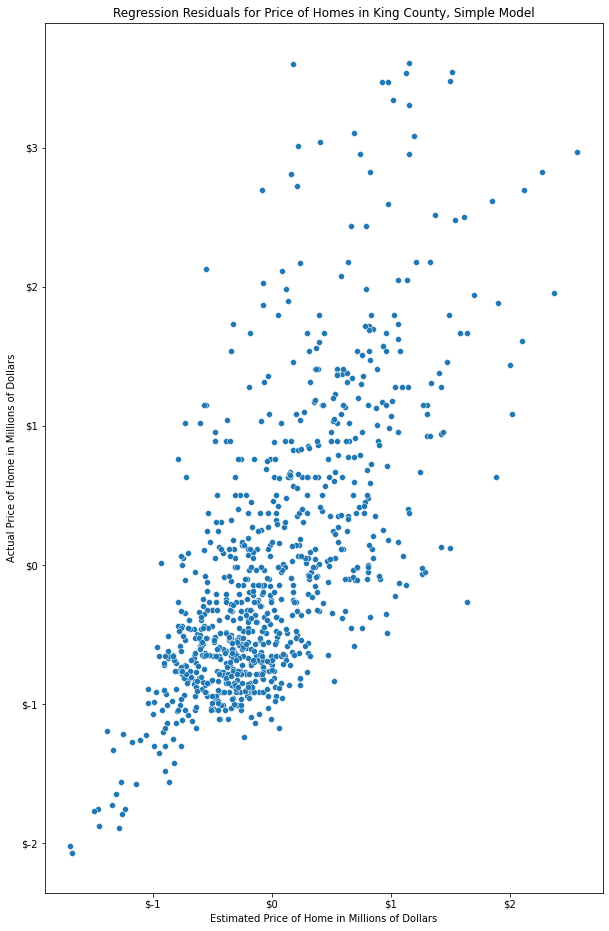

In [26]:
fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = simple_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0, 4, 1)],[range(0, 4, 1)]

plt.show()

- Note from Jelly: This makes sense, didn't need the orange axis coming thorugh, this is a plot of our variance between the actual and estimated. 

### Next Model, more variables, 3 highest correlating to price

In [40]:
X_train_third_model = X_train[['price_sqft','sqft_living', 'grade_code']]
X_test_third_model = X_test[['price_sqft','sqft_living','grade_code']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

third_model = LinearRegression()
third_model.fit(X_train_third_model,y_train)

third_model_scores = cross_validate(
    estimator=simple_model,
    X=new_df[['price_sqft', 'sqft_living', 'grade_code']],
    y=new_df.price,
    return_train_score=True,
    cv=splitter
)

third_predict_train = third_model.predict(X_train_third_model)
third_predict_test = third_model.predict(X_test_third_model)

third_train_RMSE = MSE(y_train,third_predict_train,squared = False)
third_test_RMSE = MSE(y_test,third_predict_test, squared = False)

third_condition_num = sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit().condition_number

print(f'Third Model Train score: {third_model_scores["train_score"].mean()}')
print(f'Third Model Train RMSE: {(third_train_RMSE)}')
print()
print(f'Third Model Train Condition Number: {third_condition_num}')
print()
print("Third Model Test score: ", third_model_scores["test_score"].mean())
print(f'Third Model Test RMSE: {(third_test_RMSE)}')

Third Model Train score: 0.9305304474314836
Third Model Train RMSE: 0.2690073170827898

Third Model Train Condition Number: 2.3147012142445265

Third Model Test score:  0.9348314235638888
Third Model Test RMSE: 0.24487650980706402


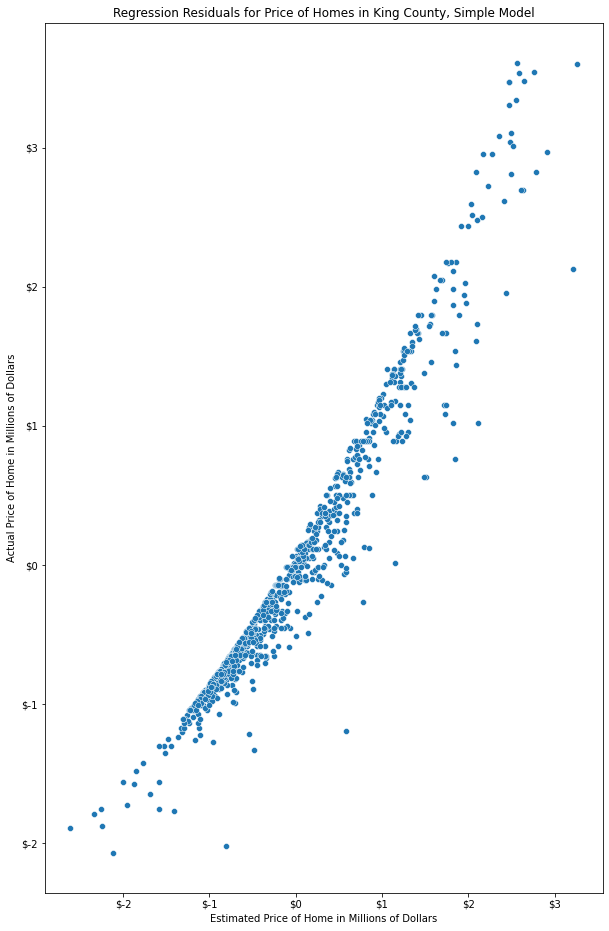

In [28]:
fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = third_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0, 4, 1)],[range(0, 4, 1)]

plt.show()

In [29]:
third_model.coef_

array([0.7993689 , 0.66476628, 0.05404437])

In [30]:
df['price_sqft'].describe()

count    2618.000000
mean      450.246706
std       167.938864
min        22.943038
25%       334.851960
50%       417.303324
75%       544.270251
max      1254.629630
Name: price_sqft, dtype: float64

### Coefficients for Third Model
- 0.799[price/sqft], 0.665[sqft_living], 0.05[grade_code]

In [33]:
df['price'].describe()

count    2.618000e+03
mean     8.548906e+05
std      3.877088e+05
min      4.118100e+04
25%      5.800000e+05
50%      7.500000e+05
75%      1.025000e+06
max      2.301000e+06
Name: price, dtype: float64

In [34]:
df['sqft_living'].describe()

count    2618.000000
mean     1945.639037
std       633.012981
min       770.000000
25%      1492.500000
50%      1840.000000
75%      2260.000000
max      5490.000000
Name: sqft_living, dtype: float64

In [37]:
df['grade_code'].describe()

count    2618.000000
mean        7.561879
std         0.734664
min         7.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        12.000000
Name: grade_code, dtype: float64

### Another Model, Everything

In [31]:
X_train_fourth_model = X_train
X_test_fourth_model = X_test

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

fourth_model = LinearRegression()
fourth_model.fit(X_train_fourth_model,y_train)

fourth_model_scores = cross_validate(
    estimator=simple_model,
    X=new_df.drop(columns = 'price'),
    y=new_df.price,
    return_train_score=True,
    cv=splitter
)

fourth_predict_train = fourth_model.predict(X_train_fourth_model)
fourth_predict_test = fourth_model.predict(X_test_fourth_model)

fourth_train_RMSE = MSE(y_train,fourth_predict_train,squared = False)
fourth_test_RMSE = MSE(y_test,fourth_predict_test, squared = False)

fourth_condition_num = sm.OLS(y_train, sm.add_constant(X_train_fourth_model)).fit().condition_number

print(f'Fourth Model Train score: {fourth_model_scores["train_score"].mean()}')
print(f'Fourth Model Train RMSE: {(fourth_train_RMSE)}')
print()
print(f'Fourth Model Train Condition Number: {fourth_condition_num}')
print()
print("Fourth Model Test score: ", fourth_model_scores["test_score"].mean())
print(f'Fourth Model Test RMSE: {(fourth_test_RMSE)}')

Fourth Model Train score: 0.9316333091834593
Fourth Model Train RMSE: 0.26711360675598167

Fourth Model Train Condition Number: 3.82062581474638

Fourth Model Test score:  0.9349638986370231
Fourth Model Test RMSE: 0.24392656578511027


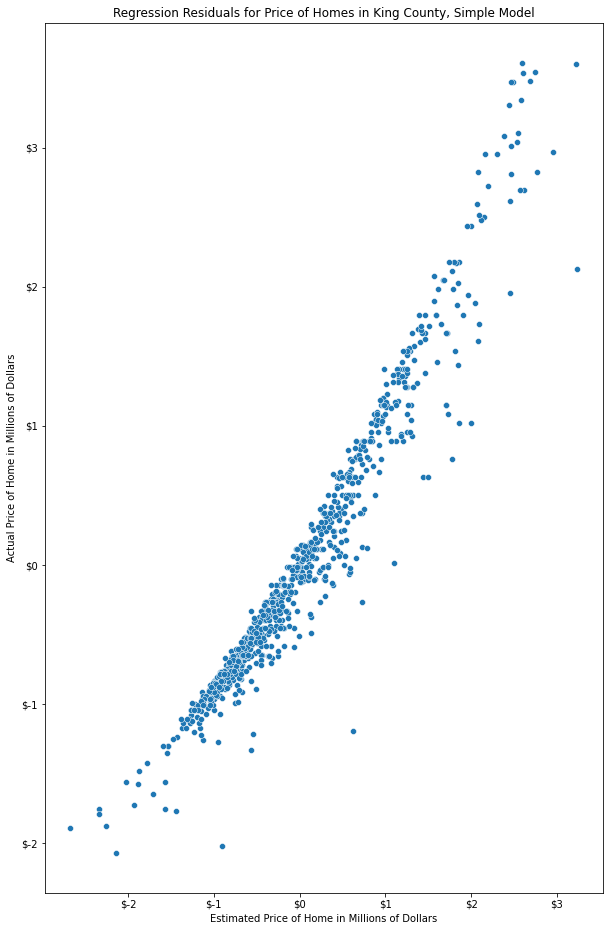

In [32]:
fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = fourth_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0, 4, 1)],[range(0, 4, 1)]

plt.show()

### Might be too colinear so we're taking out price/sqft

In [42]:
X_train_fifth_model = X_train[['sqft_living', 'grade_code']]
X_test_fifth_model = X_test[['sqft_living','grade_code']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

fifth_model = LinearRegression()
fifth_model.fit(X_train_fifth_model,y_train)

fifth_model_scores = cross_validate(
    estimator=simple_model,
    X=new_df[['sqft_living', 'grade_code']],
    y=new_df.price,
    return_train_score=True,
    cv=splitter
)

fifth_predict_train = fifth_model.predict(X_train_fifth_model)
fifth_predict_test = fifth_model.predict(X_test_fifth_model)

fifth_train_RMSE = MSE(y_train,fifth_predict_train,squared = False)
fifth_test_RMSE = MSE(y_test,fifth_predict_test, squared = False)

fifth_condition_num = sm.OLS(y_train, sm.add_constant(X_train_fifth_model)).fit().condition_number

print(f'Ffith Model Train score: {fifth_model_scores["train_score"].mean()}')
print(f'Fifth Model Train RMSE: {(fifth_train_RMSE)}')
print()
print(f'Fifth Model Train Condition Number: {fifth_condition_num}')
print()
print("Fifth Model Test score: ", fifth_model_scores["test_score"].mean())
print(f'Fifth Model Test RMSE: {(fifth_test_RMSE)}')

Ffith Model Train score: 0.36461443457532844
Fifth Model Train RMSE: 0.8021299954073828

Fifth Model Train Condition Number: 2.0669226521621398

Fifth Model Test score:  0.38891878251749673
Fifth Model Test RMSE: 0.7731667008976532


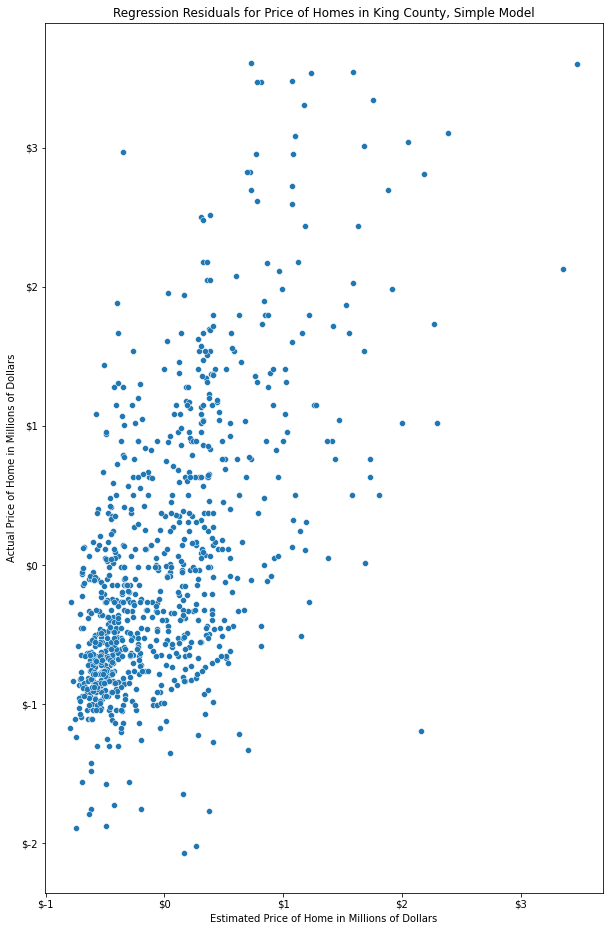

In [43]:
fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = fifth_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0, 4, 1)],[range(0, 4, 1)]

plt.show()

In [45]:
fifth_model.coef_

array([0.29224312, 0.37772372])

In [46]:
df['sqft_living'].describe()

count    2618.000000
mean     1945.639037
std       633.012981
min       770.000000
25%      1492.500000
50%      1840.000000
75%      2260.000000
max      5490.000000
Name: sqft_living, dtype: float64

In [47]:
df['grade_code'].describe()

count    2618.000000
mean        7.561879
std         0.734664
min         7.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        12.000000
Name: grade_code, dtype: float64

In [48]:
df['price'].describe()

count    2.618000e+03
mean     8.548906e+05
std      3.877088e+05
min      4.118100e+04
25%      5.800000e+05
50%      7.500000e+05
75%      1.025000e+06
max      2.301000e+06
Name: price, dtype: float64

In [50]:
df['grade_code'].value_counts()

7     1451
8      932
9      175
10      53
11       5
12       2
Name: grade_code, dtype: int64